# 心理测量曲线拟合

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# import os
import pandas as pd
from scipy.stats import norm
# from fit_psyche.psychometric_curve import PsychometricCurve

## 导入数据
### 直接读取从R里面清洗并计算好后的数据

In [3]:
# 设置目标文件夹相对路径
folder_all = "../3_2_pilot_expt_v3/output/df_all.csv"
folder_motion = "../3_2_pilot_expt_v3/output/df_motion.csv"
folder_color = "../3_2_pilot_expt_v3/output/df_color.csv"

# 使用 read_csv 函数读取CSV文件，指定分隔符为空格
df_all = pd.read_csv(folder_all, sep=' ')
df_motion = pd.read_csv(folder_motion, sep=' ')
df_color = pd.read_csv(folder_color, sep=' ')

### 先将所有被试的数据进行拟合

运动条件

C:\Users\HW\AppData\Roaming\Python\Python312\site-packages\fit_psyche\psychometric_curve.py:139: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


0.4561011299705944
{'mean': np.float64(2.3102341152818184e-14), 'var': np.float64(0.17723430703838655), 'guess_rate': np.float64(0.046617968876548704), 'lapse_rate': np.float64(0.049999999999999996)}


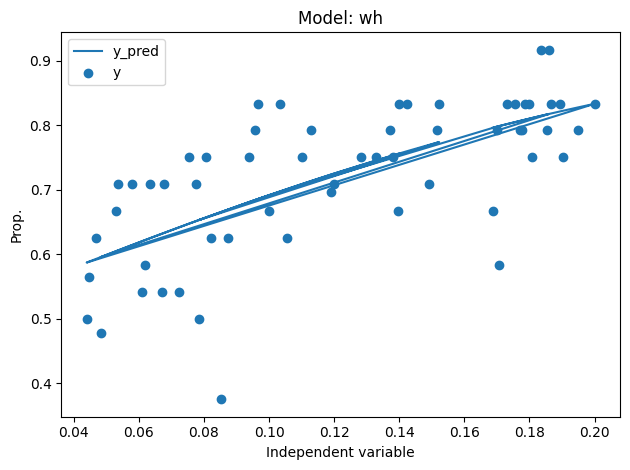

In [ ]:
# fit the data
# x轴为相干性，y轴为正确率
x = df_motion["coherence"]
y = df_motion["acc"]

pc = PsychometricCurve(model='wh').fit(x, y) # (Wichmann & Hill, 2001)
pc.plot(x, y)
print(pc.score(x, y))
print(pc.coefs_)

颜色条件

C:\Users\HW\AppData\Roaming\Python\Python312\site-packages\fit_psyche\psychometric_curve.py:139: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


0.5681272985426389
{'mean': np.float64(0.4904112447762099), 'var': np.float64(0.09254992891254263), 'guess_rate': np.float64(0.04999999999450302), 'lapse_rate': np.float64(0.04999999999955364)}


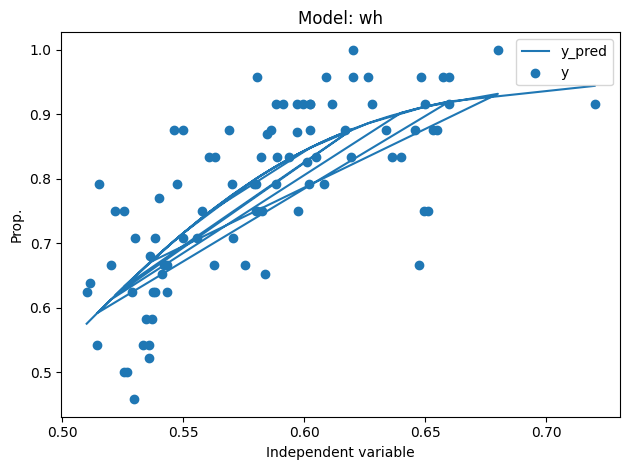

In [3]:
# fit the data
x = df_color["target_color_proportion"]
y = df_color["acc"]

pc = PsychometricCurve(model='wh').fit(x, y)
pc.plot(x, y)
print(pc.score(x, y))
print(pc.coefs_)

### 单个被试的拟合

运动

In [9]:
# 按被试 ID 分组
grouped = df_motion.groupby(['Participant_ID', 'difficulty'])
# grouped = df_motion.groupby('difficulty')

# 遍历每个被试
for participant_id, group in grouped:
    # 提取当前被试的 x 和 y 数据
    x = group['coherence'].values
    y = group['acc'].values

    # 初始化并拟合心理物理曲线
    pc = PsychometricCurve(model='wh')
    pc.fit(x, y)

    # 打印得分和系数
    score = pc.score(x, y)
    coefs = pc.coefs_
    print(f'Participant ID: {participant_id}')
    print(f'Score: {score}')
    print(f'Coefficients: {coefs}')
    print()

Participant ID: (np.int64(1), 'easy_formal')
Score: 0.5142427321032392
Coefficients: {'mean': np.float64(0.15414893759639228), 'var': np.float64(0.02413454056460868), 'guess_rate': np.float64(0.010000000078094803), 'lapse_rate': np.float64(0.04999999999999102)}

Participant ID: (np.int64(1), 'hard_formal')
Score: 0.35749240632068846
Coefficients: {'mean': np.float64(0.034556342318496525), 'var': np.float64(0.08506934281331488), 'guess_rate': np.float64(0.010000000000054283), 'lapse_rate': np.float64(0.049999999999999996)}

Participant ID: (np.int64(2), 'easy_formal')
Score: 0.15393916909411642
Coefficients: {'mean': np.float64(0.11837571152692039), 'var': np.float64(0.0662686646898426), 'guess_rate': np.float64(0.010000000000000007), 'lapse_rate': np.float64(0.0499999999999999)}

Participant ID: (np.int64(2), 'hard_formal')
Score: 0.6369179953635111
Coefficients: {'mean': np.float64(0.021232917740348804), 'var': np.float64(0.079194831282759), 'guess_rate': np.float64(0.0100000000109324

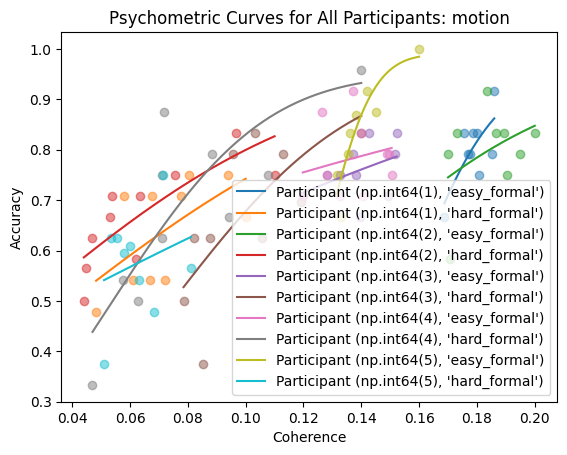

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 假设 df_motion 是已经存在的 DataFrame，包含 'Participant_ID', 'coherence', 'acc' 列
# 按被试 ID 分组
grouped = df_motion.groupby(['Participant_ID', 'difficulty'])

# 创建一个图形窗口
plt.figure()

# 遍历每个被试
for participant_id, group in grouped:
    # 提取当前被试的 x 和 y 数据
    x = group['coherence'].values
    y = group['acc'].values

    # 初始化并拟合心理物理曲线
    pc = PsychometricCurve(model='wh')
    pc.fit(x, y)

    # 生成预测数据用于绘制曲线
    x_pred = np.linspace(x.min(), x.max(), 200)
    y_pred = pc.predict(x_pred)

    # 绘制当前被试的曲线
    plt.plot(x_pred, y_pred, label=f'Participant {participant_id}', alpha=1)
    # 绘制当前被试的数据点
    plt.scatter(x, y, marker='o', alpha=0.5)

# 设置图形的标题、坐标轴标签和图例
plt.title('Psychometric Curves for All Participants: motion')
plt.xlabel('Coherence')
plt.ylabel('Accuracy')
plt.legend()

# 显示图形
plt.show()

每个被试单独绘制

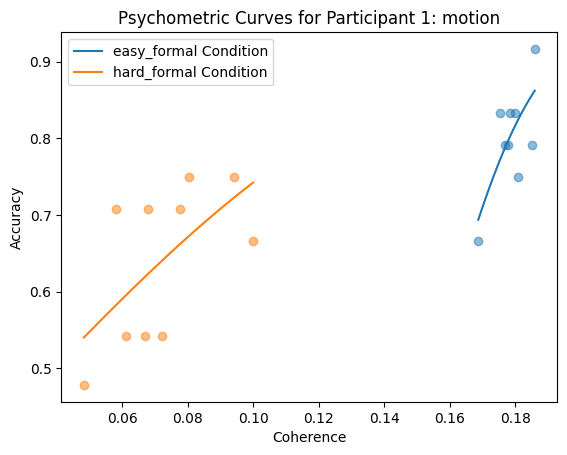

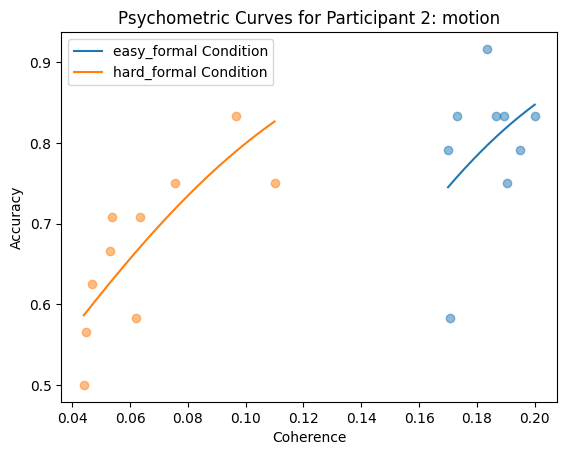

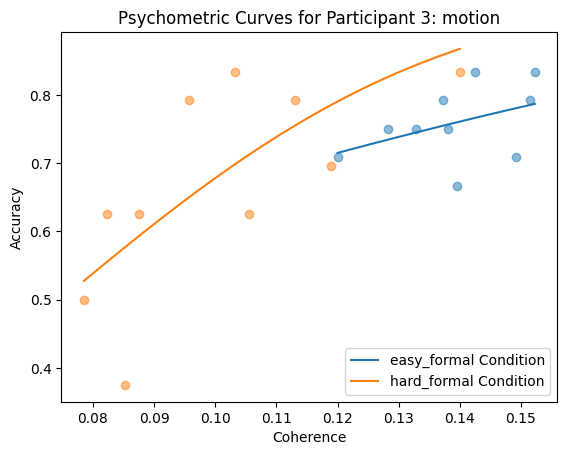

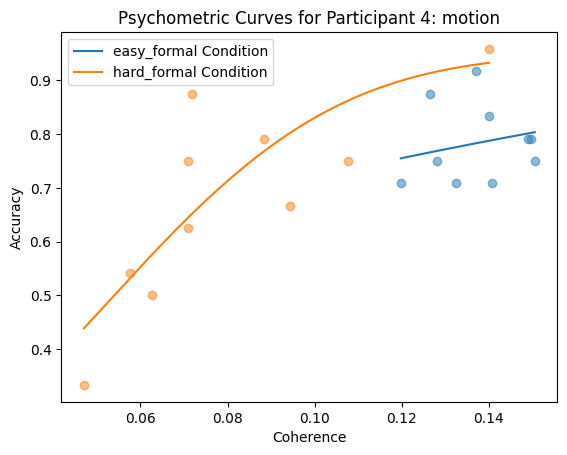

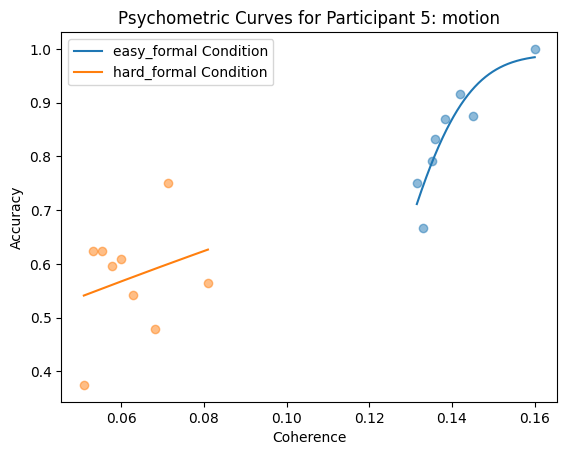

In [13]:
# 按被试 ID 分组
grouped_by_participant = df_motion.groupby('Participant_ID')

# 遍历每个被试
for participant_id, participant_group in grouped_by_participant:
    # 创建一个新的图形窗口
    plt.figure()

    # 按难度分组
    grouped_by_difficulty = participant_group.groupby('difficulty')

    # 遍历不同难度条件
    for difficulty, difficulty_group in grouped_by_difficulty:
        # 提取当前难度条件下的 x 和 y 数据
        x = difficulty_group['coherence'].values
        y = difficulty_group['acc'].values

        # 初始化并拟合心理物理曲线
        pc = PsychometricCurve(model='wh')
        pc.fit(x, y)

        # 生成预测数据用于绘制曲线
        x_pred = np.linspace(x.min(), x.max(), 200)
        y_pred = pc.predict(x_pred)

        # 绘制当前难度条件下的曲线
        plt.plot(x_pred, y_pred, label=f'{difficulty} Condition', alpha=1)
        # 绘制当前难度条件下的数据点
        plt.scatter(x, y, marker='o', alpha=0.5)

    # 设置图形的标题、坐标轴标签和图例
    plt.title(f'Psychometric Curves for Participant {participant_id}: motion')
    plt.xlabel('Coherence')
    plt.ylabel('Accuracy')
    plt.legend()

# 显示所有图形
plt.show()

颜色

In [14]:
# 按被试 ID 分组
grouped = df_color.groupby(['Participant_ID', 'difficulty'])

# 遍历每个被试
for participant_id, group in grouped:
    # 提取当前被试的 x 和 y 数据
    x = group['target_color_proportion'].values
    y = group['acc'].values

    # 初始化并拟合心理物理曲线
    pc = PsychometricCurve(model='wh')
    pc.fit(x, y)

    # 打印得分和系数
    score = pc.score(x, y)
    coefs = pc.coefs_
    print(f'Participant ID: {participant_id}')
    print(f'Score: {score}')
    print(f'Coefficients: {coefs}')
    print()

Participant ID: (np.int64(1), 'easy_formal')
Score: 0.20361957314016466
Coefficients: {'mean': np.float64(0.6133915121476836), 'var': np.float64(0.03867756452249736), 'guess_rate': np.float64(0.04999999999999933), 'lapse_rate': np.float64(0.010000000000000574)}

Participant ID: (np.int64(1), 'hard_formal')
Score: 0.29770178354542565
Coefficients: {'mean': np.float64(0.4949914548145112), 'var': np.float64(0.032242386578075787), 'guess_rate': np.float64(0.010000000000004094), 'lapse_rate': np.float64(0.049999999999999996)}

Participant ID: (np.int64(2), 'easy_formal')
Score: 0.45837950555970386
Coefficients: {'mean': np.float64(0.5501066592068622), 'var': np.float64(0.029586892082388648), 'guess_rate': np.float64(0.010000000000000002), 'lapse_rate': np.float64(0.049999999999999996)}

Participant ID: (np.int64(2), 'hard_formal')
Score: 0.36165721423809993
Coefficients: {'mean': np.float64(0.519093863457576), 'var': np.float64(0.04331036272681431), 'guess_rate': np.float64(0.04999999999993

C:\Users\HW\AppData\Roaming\Python\Python312\site-packages\fit_psyche\psychometric_curve.py:100: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = optimize.curve_fit(


C:\Users\HW\AppData\Roaming\Python\Python312\site-packages\fit_psyche\psychometric_curve.py:100: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = optimize.curve_fit(


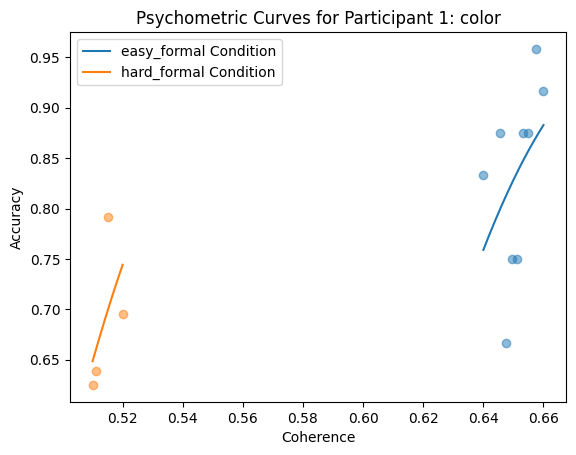

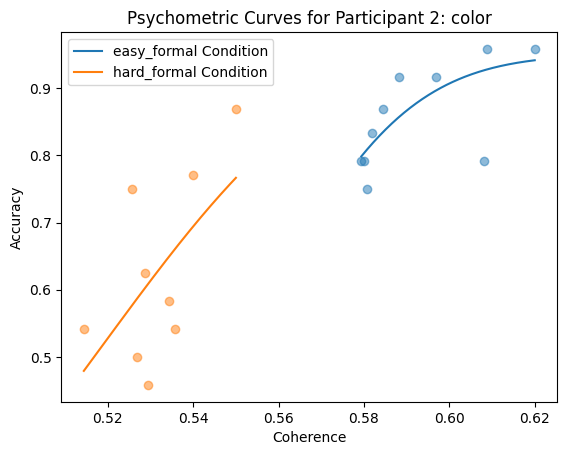

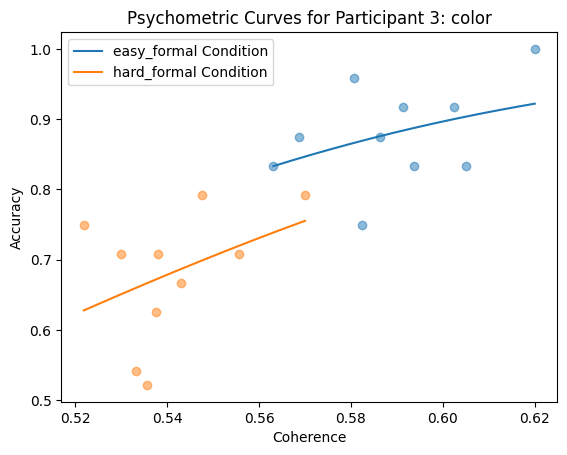

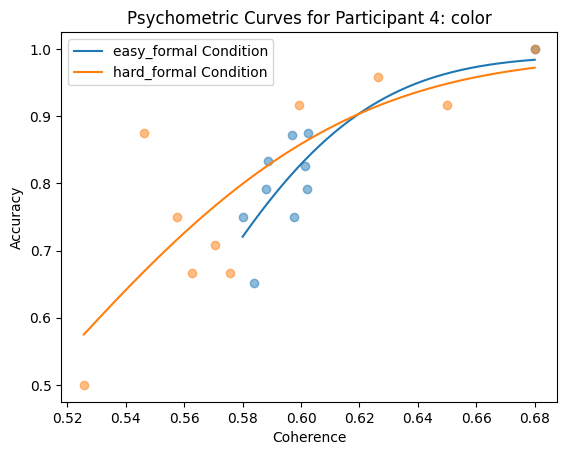

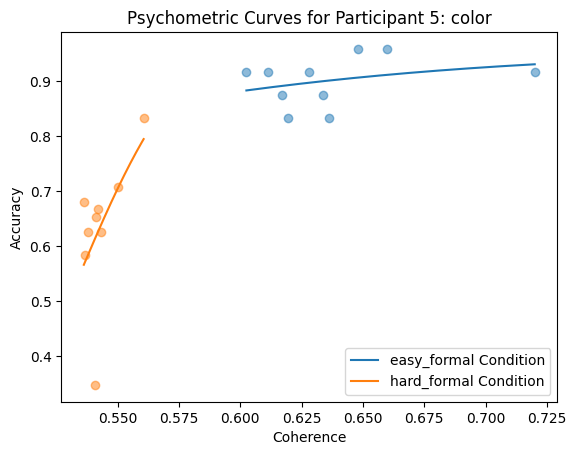

In [16]:
# 按被试 ID 分组
grouped_by_participant = df_color.groupby('Participant_ID')

# 遍历每个被试
for participant_id, participant_group in grouped_by_participant:
    # 创建一个新的图形窗口
    plt.figure()

    # 按难度分组
    grouped_by_difficulty = participant_group.groupby('difficulty')

    # 遍历不同难度条件
    for difficulty, difficulty_group in grouped_by_difficulty:
        # 提取当前难度条件下的 x 和 y 数据
        x = difficulty_group['target_color_proportion'].values
        y = difficulty_group['acc'].values

        # 初始化并拟合心理物理曲线
        pc = PsychometricCurve(model='wh')
        pc.fit(x, y)

        # 生成预测数据用于绘制曲线
        x_pred = np.linspace(x.min(), x.max(), 200)
        y_pred = pc.predict(x_pred)

        # 绘制当前难度条件下的曲线
        plt.plot(x_pred, y_pred, label=f'{difficulty} Condition', alpha=1)
        # 绘制当前难度条件下的数据点
        plt.scatter(x, y, marker='o', alpha=0.5)

    # 设置图形的标题、坐标轴标签和图例
    plt.title(f'Psychometric Curves for Participant {participant_id}: color')
    plt.xlabel('Coherence')
    plt.ylabel('Accuracy')
    plt.legend()

# 显示所有图形
plt.show()

## 使用 bayesfit 进行拟合

In [1]:
import bayesfit as bf

%matplotlib inline
%config InlineBackend.figure_format='retina'

no display found. Using non-interactive Agg backend


确保数据格式符合要求

Motion

In [118]:
# 提取 'coherence'  'correct_count' 和 'all_count' 列
df_motion_2 = df_motion[['coherence', 'correct_count', 'all_count', 'Participant_ID']]
# 把列名改为要求的格式
df_motion_2.rename(
  columns={'coherence': 'Stimulus intensity', 'correct_count': 'N-trials correct', 'all_count': 'N-trials total'},
  inplace=True)

# 根据 Participant_ID 分组
grouped = df_motion_2.groupby('Participant_ID')

# 存储每个被试的数据集
data_motion = dict()
index = 1
for _, group in grouped:
    # 去掉 Participant_ID 列并转换为 numpy.ndarray
    dataset = group.drop(columns='Participant_ID').values
    key = f'data_{index:02d}'  # 生成类似 data_01、data_02 的键
    data_motion[key] = dataset
    index += 1

C:\Users\HW\AppData\Local\Temp\ipykernel_22816\3993789268.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_motion_2.rename(


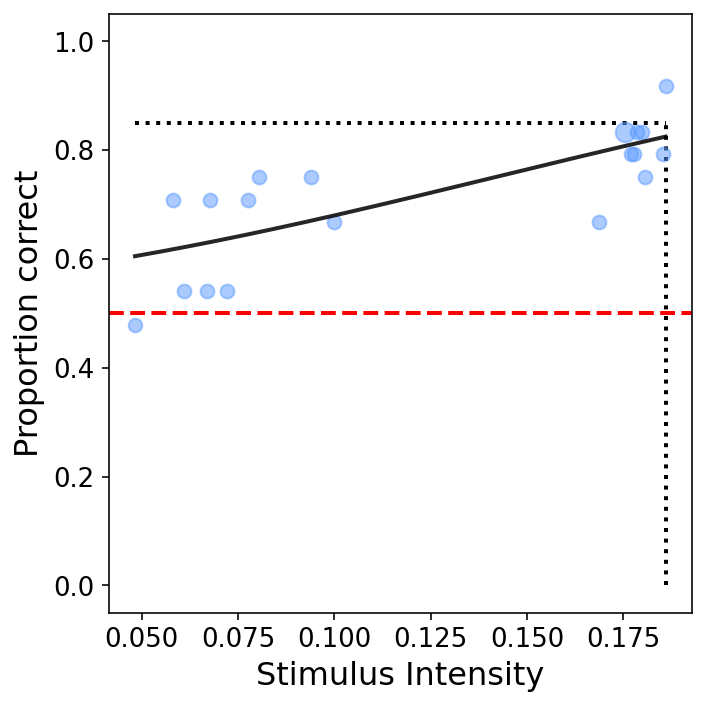

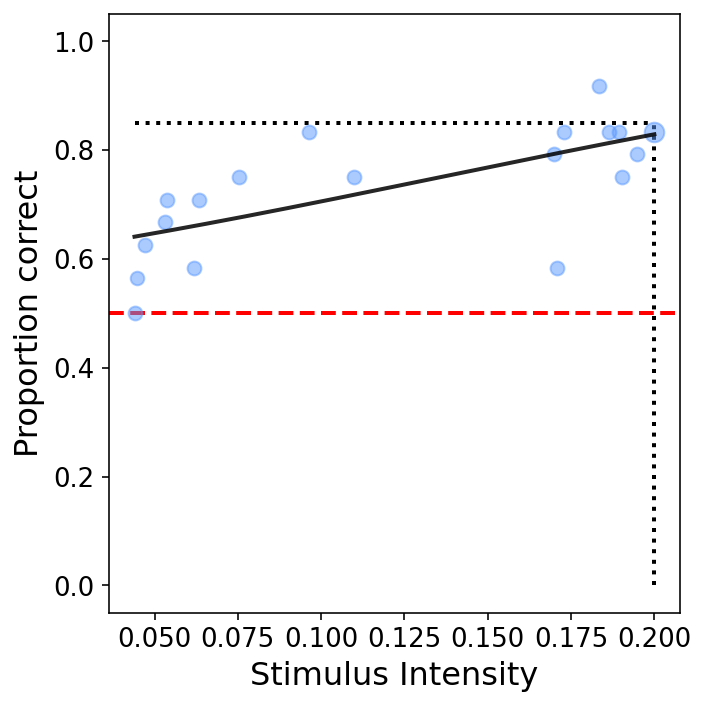

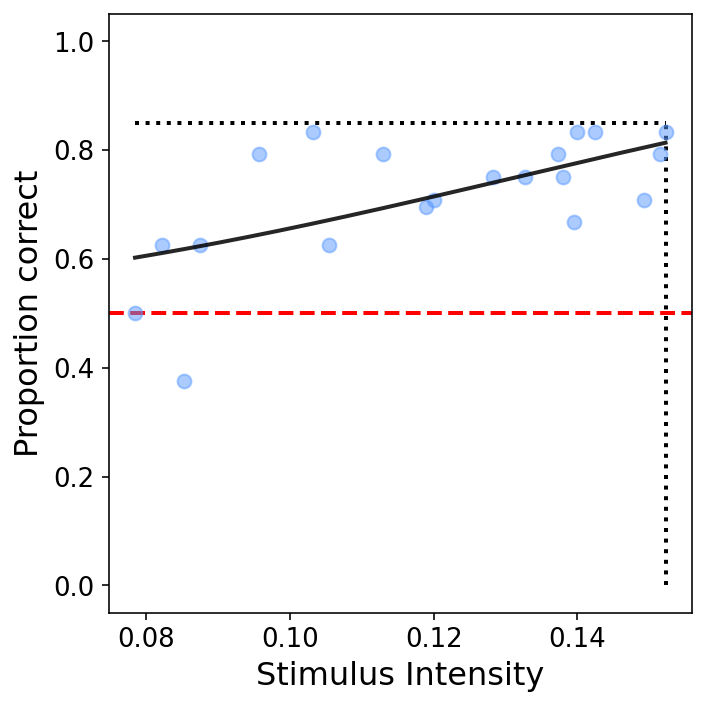

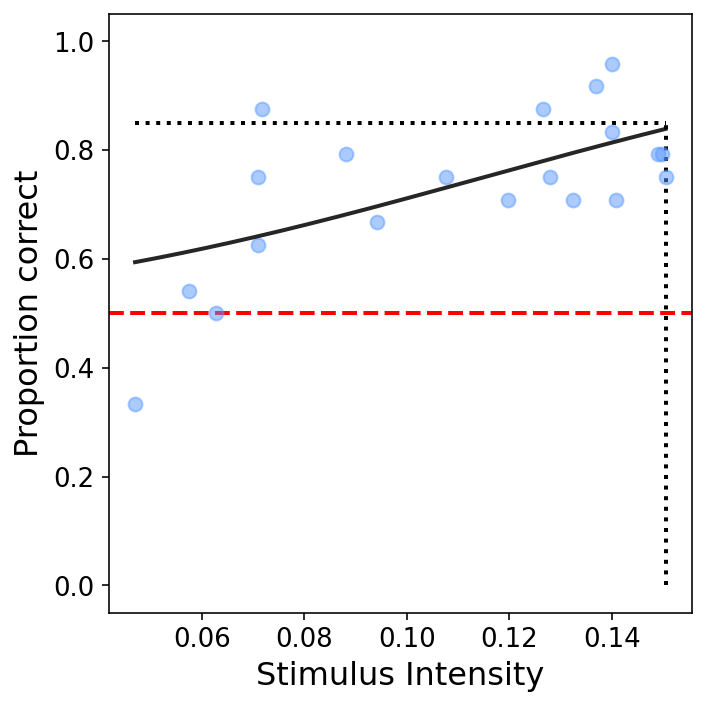

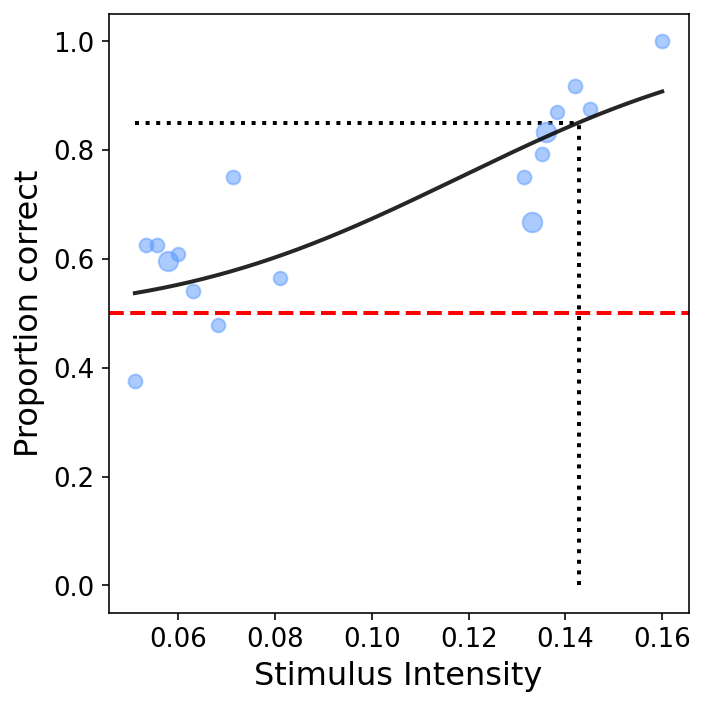

In [120]:
for key in data_motion.keys():
    # 拟合模型
    metrics, options = bf.fitmodel(data_motion[key], threshold = 0.85, sigmoid_type = 'norm')
    # 绘制心理物理学函数曲线
    bf.plot_psyfcn(data_motion[key], options, metrics, scale_pnts=True, estimate_type = 'MAP')
    plt.show()

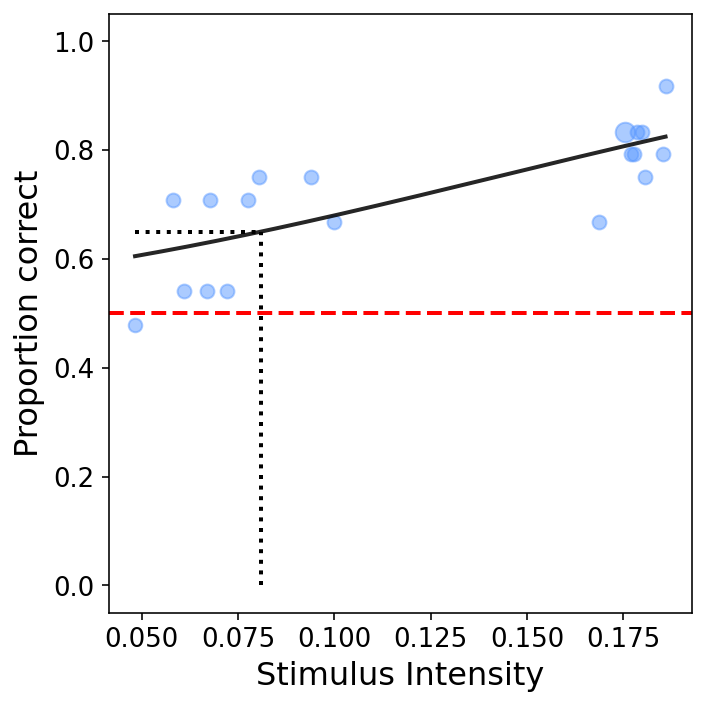

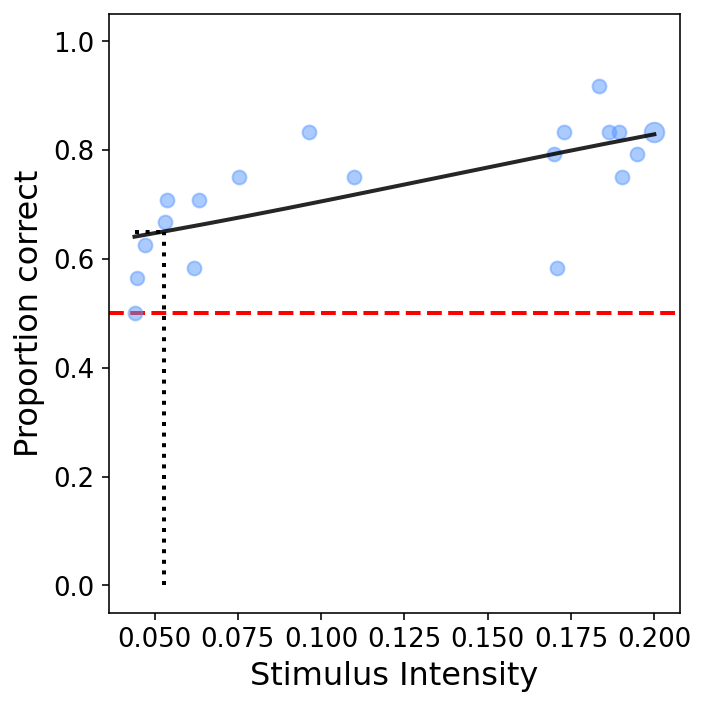

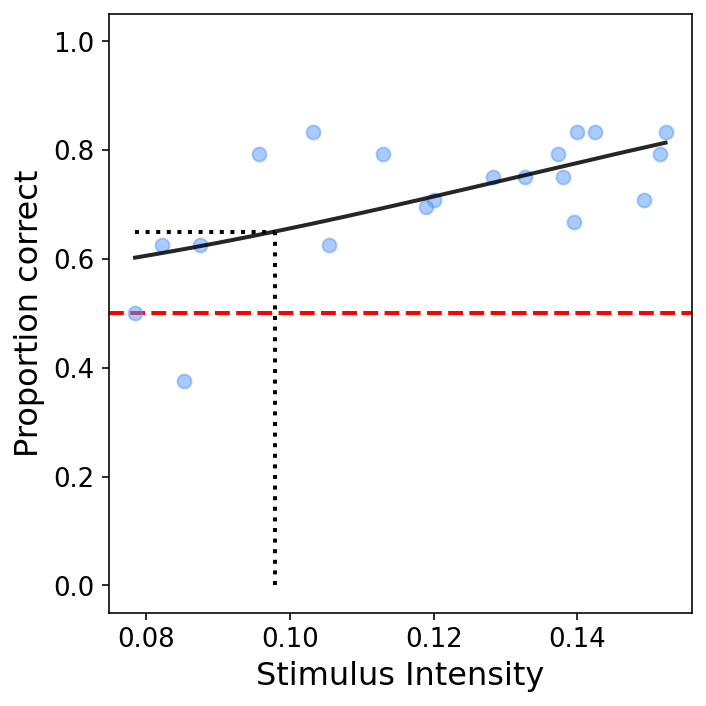

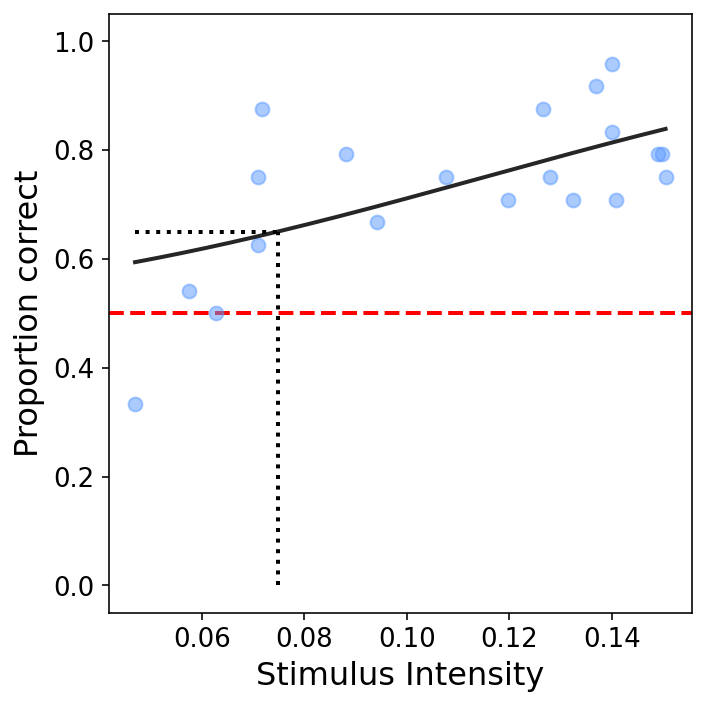

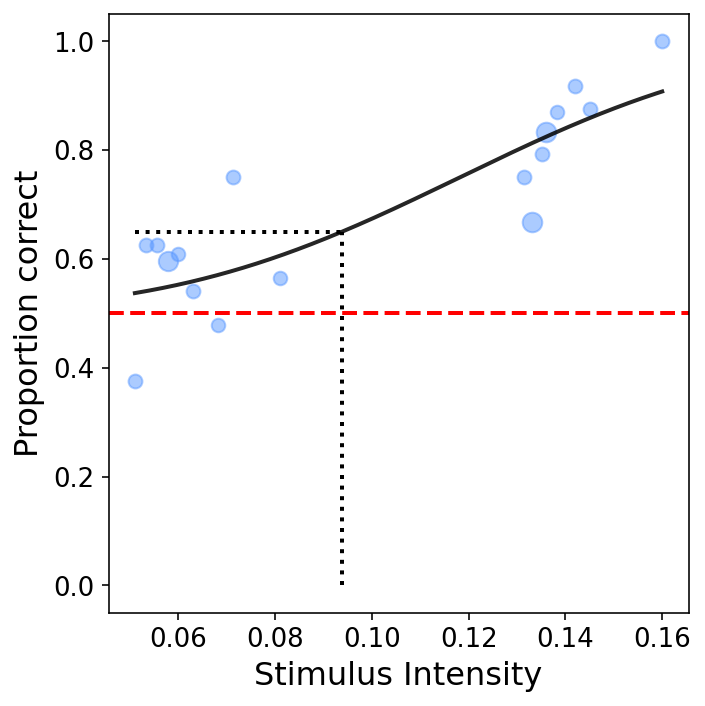

In [123]:
for key in data_motion.keys():
    # 拟合模型
    metrics, options = bf.fitmodel(data_motion[key], threshold = 0.65, sigmoid_type = 'norm')
    # 绘制心理物理学函数曲线
    bf.plot_psyfcn(data_motion[key], options, metrics, scale_pnts = True, estimate_type = 'MAP')
    # bf.get_threshold(data_motion[key], metrics, options, threshold_pc = 0.2, estimate_type ='MAP')
    plt.show()

Color

In [23]:
# 提取 'target_color_proportion'  'correct_count' 和 'all_count' 列
df_color_2 = df_color[['target_color_proportion', 'correct_count', 'all_count', 'Participant_ID']]
# 把列名改为要求的格式
df_color_2.rename(
  columns={'target_color_proportion': 'Stimulus intensity', 'correct_count': 'N-trials correct', 'all_count': 'N-trials total'},
  inplace=True)

# 根据 Participant_ID 分组
grouped = df_color_2.groupby('Participant_ID')

# 存储每个被试的数据集
data_color = dict()
index = 1
for _, group in grouped:
    # 去掉 Participant_ID 列并转换为 numpy.ndarray
    dataset = group.drop(columns='Participant_ID').values
    key = f'data_{index:02d}'  # 生成类似 data_01、data_02 的键
    data_color[key] = dataset
    index += 1

C:\Users\HW\AppData\Local\Temp\ipykernel_7988\3232231717.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_color_2.rename(


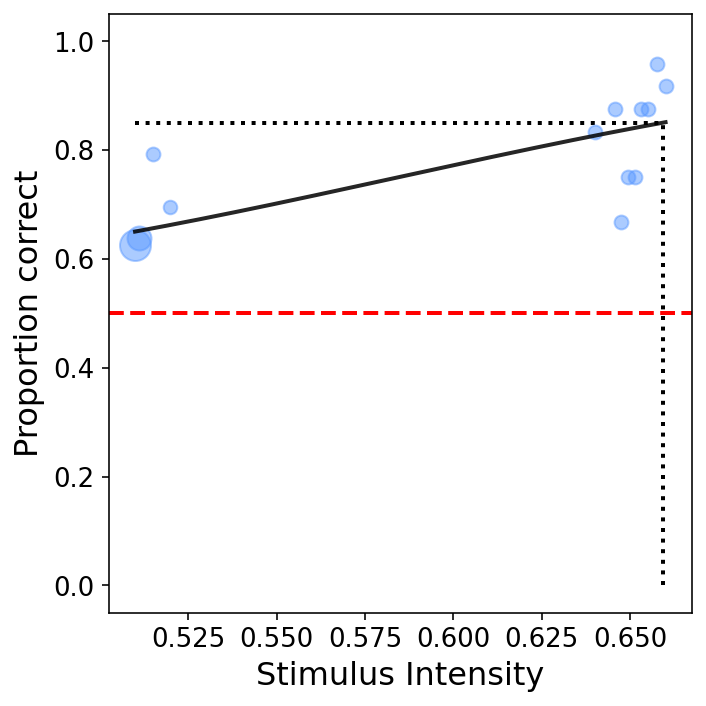

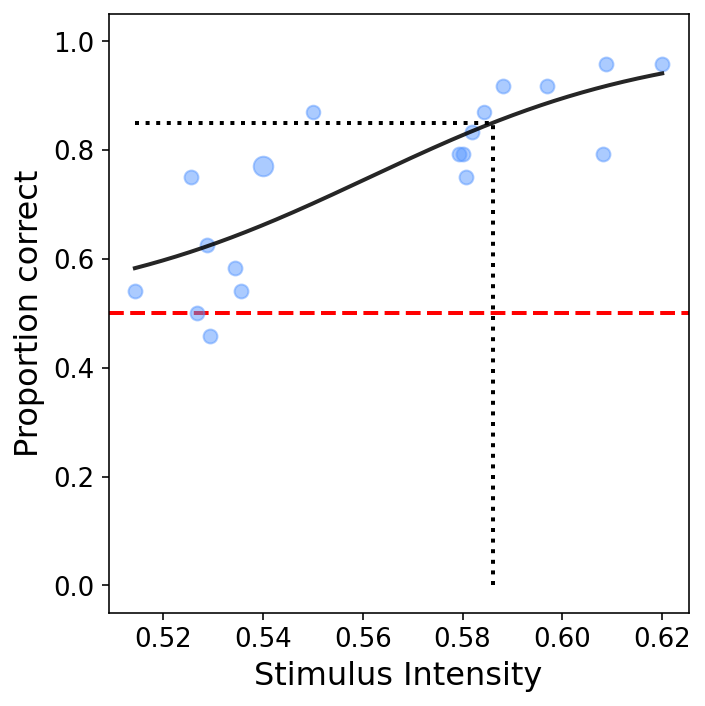

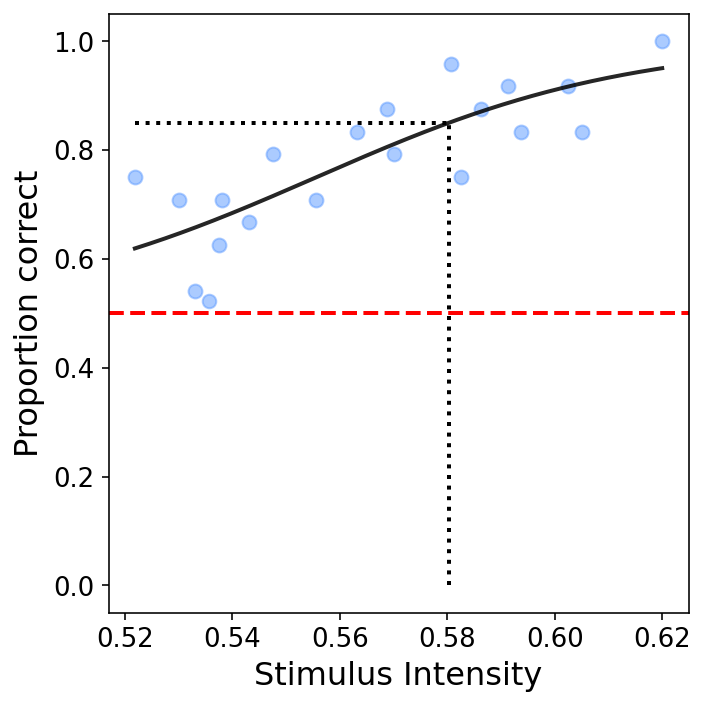

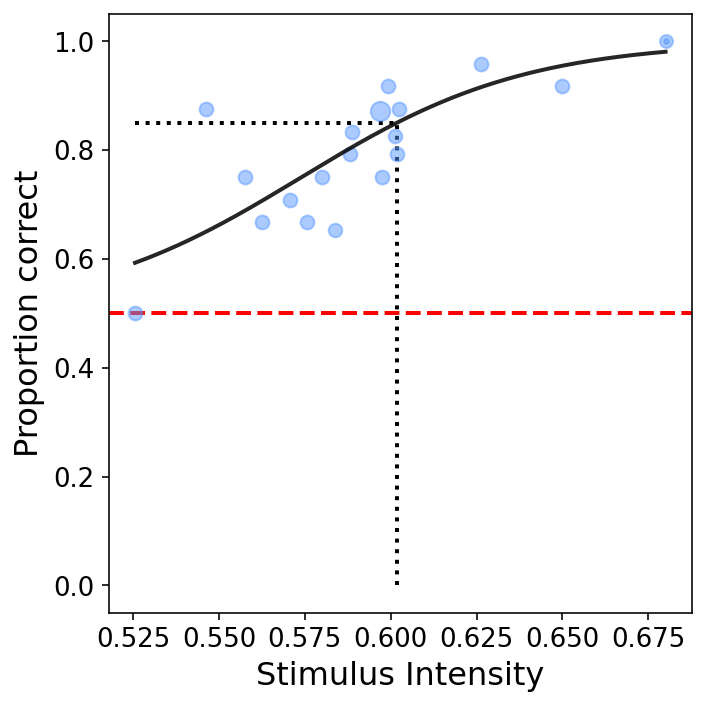

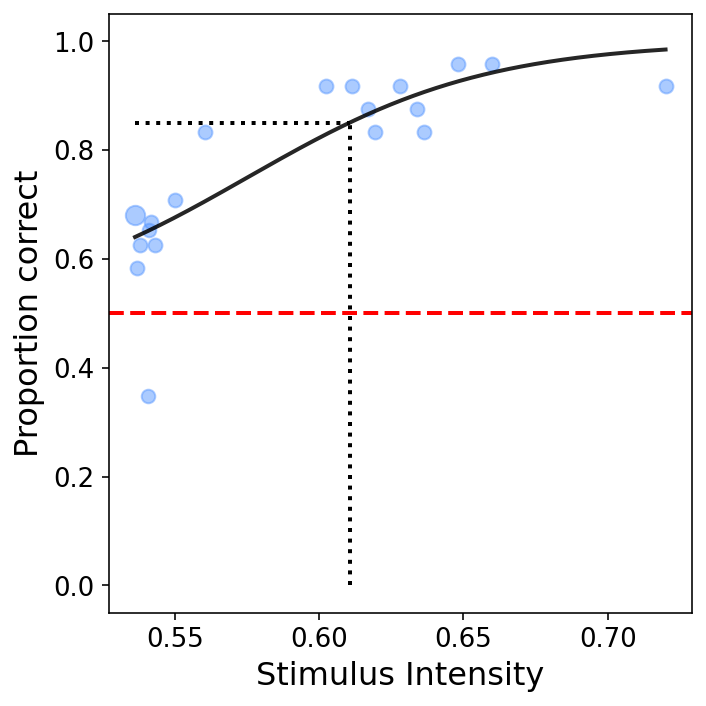

In [128]:
for key in data_color.keys():
    # 拟合模型
    metrics, options = bf.fitmodel(data_color[key], threshold = 0.85, sigmoid_type = 'logistic')
    # 绘制心理物理学函数曲线
    bf.plot_psyfcn(data_color[key], options, metrics, scale_pnts=True, estimate_type = 'MAP')
    plt.show()

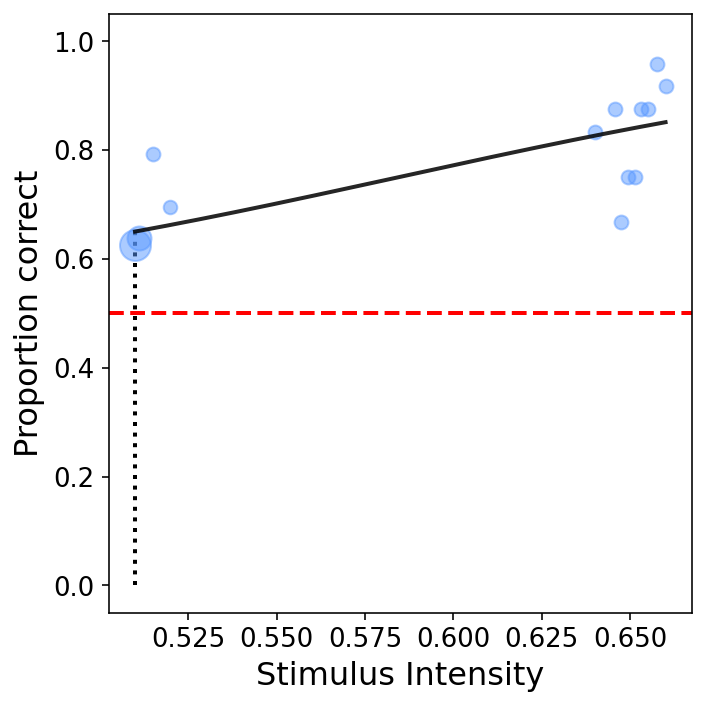

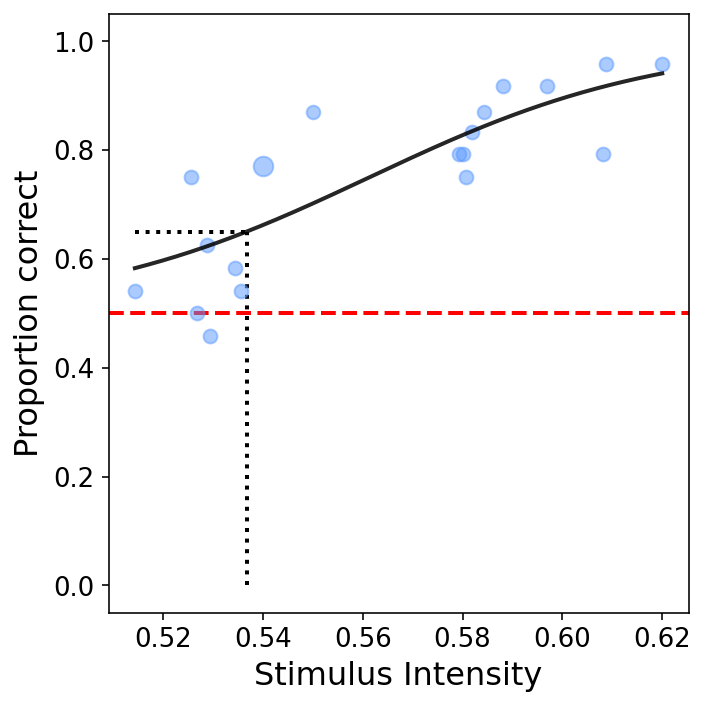

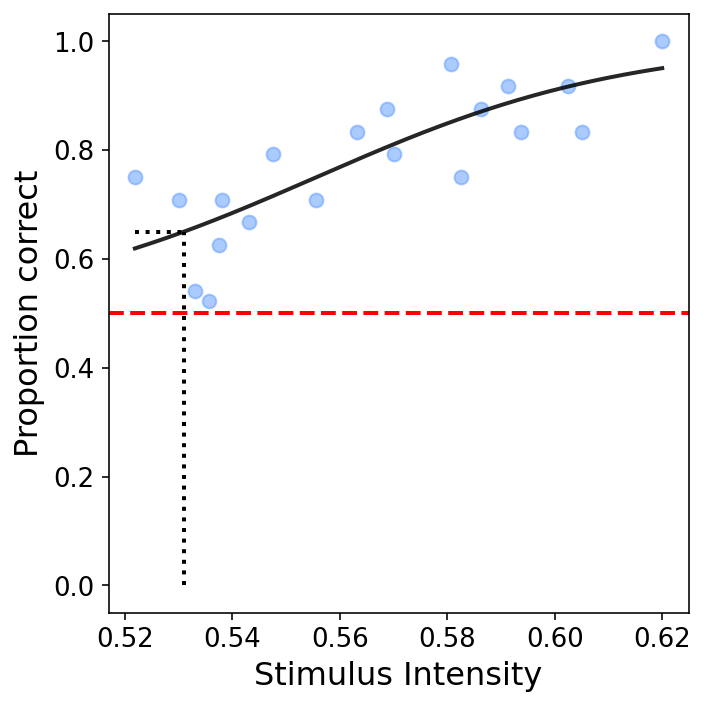

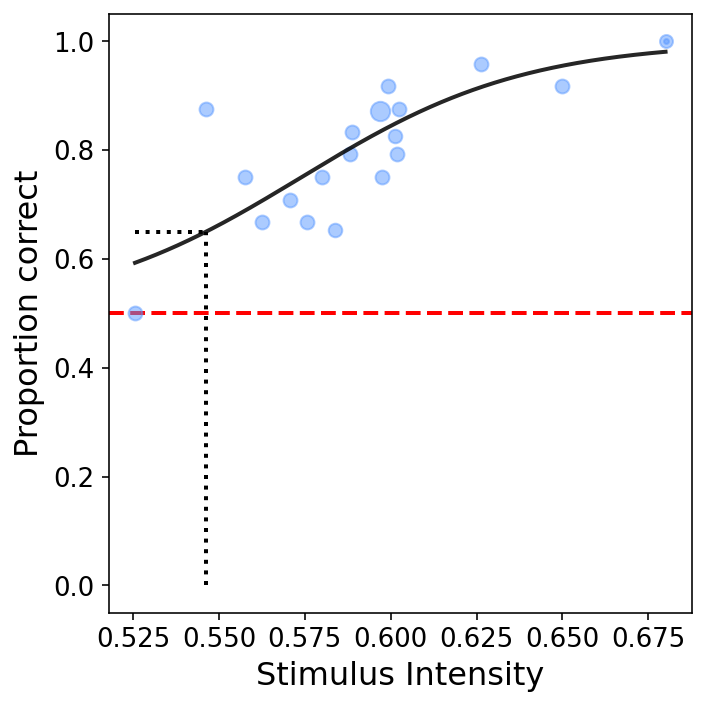

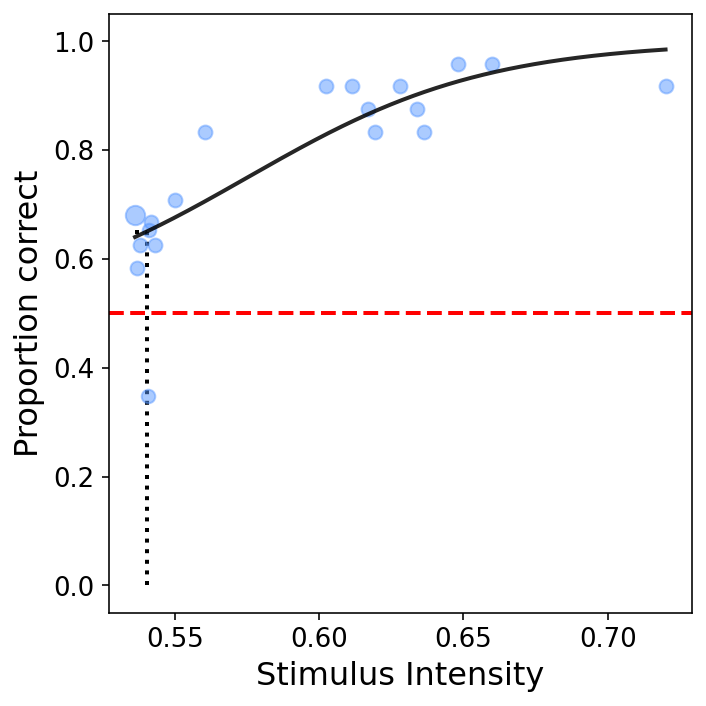

In [127]:
for key in data_color.keys():
    # 拟合模型
    metrics, options = bf.fitmodel(data_color[key], threshold = 0.65, sigmoid_type = 'logistic')
    # 绘制心理物理学函数曲线
    bf.plot_psyfcn(data_color[key], options, metrics, scale_pnts=True, estimate_type = 'MAP')
    plt.show()

#### 分析不同颜色的差异

重新读取数据

In [28]:
new_path = "../3_2_pilot_expt_v3/output/df_color2.csv"

df_color2 = pd.read_csv(new_path, sep=' ')

In [29]:
df_color2

,Participant_ID,part,difficulty,target_color_proportion,dot_color_final,avg_rt,max_rt,min_rt,sd_rt,all_count,row_count,correct_count,acc
0,1,color_formal,easy_formal,0.640000,blue,777.833333,917,649,81.188706,12,12,9,0.750000
1,1,color_formal,easy_formal,0.640000,red,812.000000,966,599,111.431185,12,12,11,0.916667
2,1,color_formal,easy_formal,0.645625,blue,889.666667,1017,695,81.939372,12,12,12,1.000000
3,1,color_formal,easy_formal,0.645625,red,789.416667,954,656,107.257937,12,12,9,0.750000
4,1,color_formal,easy_formal,0.647500,blue,909.916667,1161,777,110.913937,12,12,8,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,5,color_formal,hard_formal,0.543125,red,887.500000,1517,659,235.167059,12,12,6,0.500000
177,5,color_formal,hard_formal,0.550000,blue,1114.750000,2278,713,506.206951,12,12,9,0.750000
178,5,color_formal,hard_formal,0.550000,red,962.750000,1873,644,318.632340,12,12,8,0.666667
179,5,color_formal,hard_formal,0.560625,blue,777.166667,956,659,97.256767,12,12,10,0.833333


In [30]:
# 提取 'target_color_proportion'  'correct_count' 和 'all_count' 列
df_color2 = df_color2[['target_color_proportion', 'correct_count', 'all_count', 'dot_color_final']]
# 把列名改为要求的格式
df_color2.rename(
  columns={'target_color_proportion': 'Stimulus intensity', 'correct_count': 'N-trials correct', 'all_count': 'N-trials total'},
  inplace=True)

# 根据 Participant_ID 分组
grouped = df_color2.groupby('dot_color_final')

# 存储每个被试的数据集
data_color2 = dict()
index = 1
for _, group in grouped:
    # 去掉 Participant_ID 列并转换为 numpy.ndarray
    dataset = group.drop(columns='dot_color_final').values
    key = f'data_{index:02d}'  # 生成类似 data_01、data_02 的键
    data_color2[key] = dataset
    index += 1

C:\Users\HW\AppData\Local\Temp\ipykernel_7988\4114784431.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_color2.rename(


In [31]:
data_color2

{'data_01': array([[ 0.64    ,  9.      , 12.      ],
        [ 0.645625, 12.      , 12.      ],
        [ 0.6475  ,  8.      , 12.      ],
        [ 0.649375,  6.      , 12.      ],
        [ 0.65125 ,  8.      , 12.      ],
        [ 0.653125,  9.      , 12.      ],
        [ 0.655   ,  9.      , 12.      ],
        [ 0.6575  , 11.      , 12.      ],
        [ 0.66    , 11.      , 12.      ],
        [ 0.51    , 37.      , 60.      ],
        [ 0.51125 , 18.      , 36.      ],
        [ 0.515   ,  9.      , 12.      ],
        [ 0.52    , 10.      , 12.      ],
        [ 0.579375, 12.      , 12.      ],
        [ 0.58    , 10.      , 12.      ],
        [ 0.580625, 12.      , 12.      ],
        [ 0.581875, 12.      , 12.      ],
        [ 0.584375, 10.      , 11.      ],
        [ 0.588125, 12.      , 12.      ],
        [ 0.596875, 12.      , 12.      ],
        [ 0.608125,  8.      , 12.      ],
        [ 0.60875 , 11.      , 12.      ],
        [ 0.62    , 11.      , 12.      ],


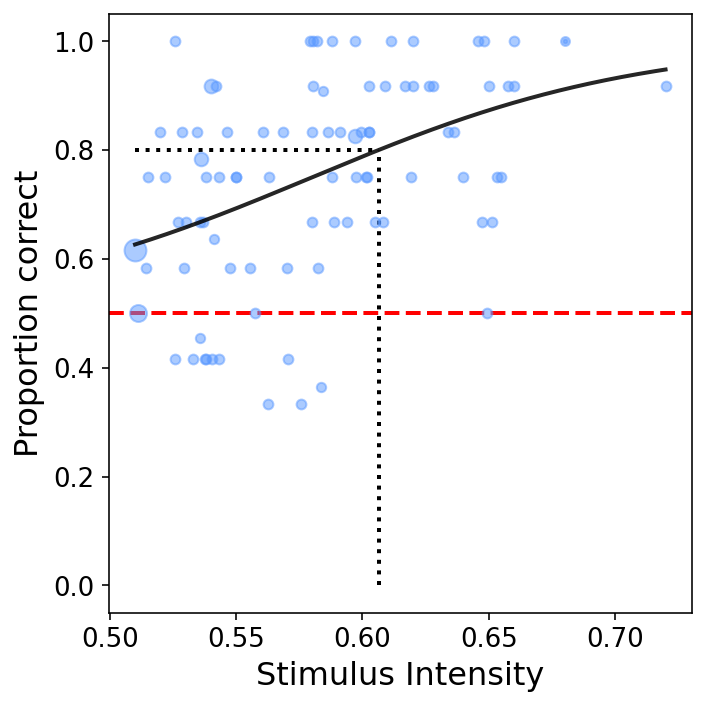

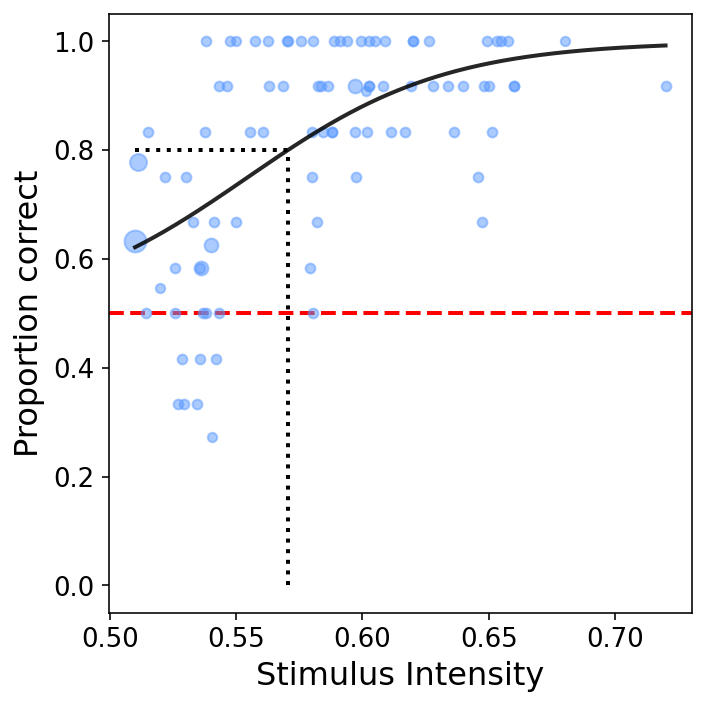

In [36]:
for key in data_color2.keys():
    # 拟合模型
    metrics, options = bf.fitmodel(data_color2[key], threshold = 0.8, sigmoid_type = 'logistic')
    # 绘制心理物理学函数曲线
    bf.plot_psyfcn(data_color2[key], options, metrics, scale_pnts=True, estimate_type = 'MAP')
    plt.show()